# A First Predictive Modeling Project

In this notebook we will use the simple linear regression model to demonstrate the process of predictive model selection in a vaguely realistic scenario.

## What we will accomplish

In particular we will:
- Review some of the common steps in a predictive modeling project,
- Work with a baseball data set,
- Introduct the concept of a baseline model and
- Practice implementing cross-validation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style

set_style("whitegrid")

## Example: A baseball regression problem

Let's imagine we work for a major league baseball team in the off-season. During the off-season teams are looking to see what players they can bring in to improve upon their number of wins in the coming season.

A reasonable question is whether stocking up on good defensive players (limiting the number of runs your team allows) or stocking up on good offensive players (increasing the number of runs your teams scores) is better at predicting the number of wins you will have in a given season. We could use existing projections for each player to estimate our number of runs scores and runs allowed after acquiring said player to predict our expected wins.

In this problem we will do just that (kind of). First let's load the data.

#### Step 1. Loading data

In [2]:
## Note this works on Mac and Linux,
## you may need to change the slash directions if
## you are running a Windows machine
baseball = pd.read_csv("../../../data/baseball.csv")

In [3]:
baseball.sample(5, random_state=234)

,teamID,yearID,lgID,G,W,L,R,RA
351,PIT,2012,NL,162,79,83,651,674
189,DET,2007,AL,162,88,74,887,797
319,OAK,2011,AL,162,74,88,645,679
31,ARI,2002,NL,162,98,64,819,674
318,NYN,2011,NL,162,77,85,718,742


This data set contains the wins (`W`), losses (`L`), runs scored (`R`) and runs allowed (`RA`) for each team (`teamID`) over the 2001-2018 seasons (`yearID`).

#### Step 2. Train test split

Let's recall what we learned in `Data Splits for Predictive Modeling`, and make a train test split with $80\%$ of the data in the training set and $20\%$ of the data in the test set.

You try coding this.

In [4]:
## import train_test_split
from sklearn.model_selection import train_test_split

In [5]:
## make the train test split here
## Note a slight difference, we have to use .copy()
## for pandas dataframes
bb_train, bb_test = train_test_split(baseball.copy())

#### Step 3. Exploratory data analysis

Prior to picking potential models we will do a quick data exploration by plotting `W` against `R` and `RA` respectively. Note that we chose these plots because these are the only variables that a team may be able to change by signing players to contracts.

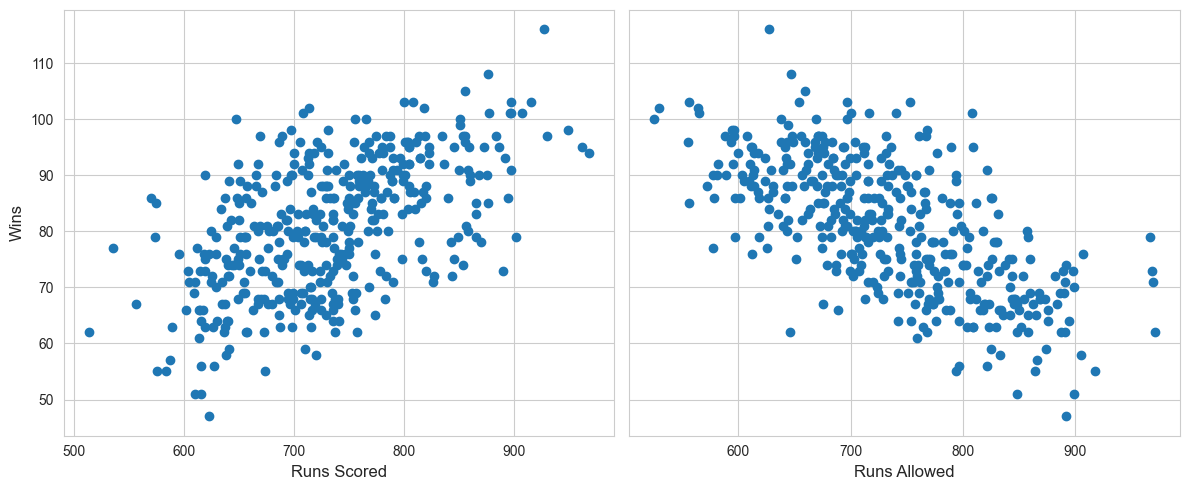

In [6]:
fig,ax = plt.subplots(1, 2, figsize=(12,5), sharey=True)

ax[0].scatter(bb_train.R, 
              bb_train.W)
ax[0].set_ylabel("Wins", fontsize=12)
ax[0].set_xlabel("Runs Scored", fontsize=12)


ax[1].scatter(bb_train.RA,
              bb_train.W)
ax[1].set_xlabel("Runs Allowed", fontsize=12)

plt.tight_layout()

plt.show()

Both of these look to be linear relationships, which is an important check for our choice in simple linear regression. If it did not look as though there was a linear relationship, we would not use simple linear regression. 

In real modeling projects there is more data exploration, but for this notebook we will continue on.

#### Step 4. Choosing some candidate models

From the exploration above there appear to be two models we should try, namely:

$$
\text{Model 1: } \ \ \texttt{W} = \beta_0 + \beta_1 \texttt{R} + \epsilon,
$$

$$
\text{Model 2: } \ \ \texttt{W} = \beta_0 + \beta_1 \texttt{RA} + \epsilon.
$$

##### Identifying a baseline model

In predictive modeling problems it is also smart to have a <i>baseline model</i>. A baseline model is a simple model that exists for comparison purposes. These are important because they allow us to put our model results into context. For example, we may end up with an MSE of $100$. Is that good? Is that bad? In the abstract it is impossible to tell. It is only when we have a reasonable baseline model that we are able to put into context how good our performance is. Again for example, if our baseline model's MSE was $1000$ our model with MSE$=100$ has done quite well, but if our baseline model's MSE was $10$ our model has underperformed the baseline.

Moreover, merely outperforming the baseline is not always an indication of the best model. We also need to consider things like training time, model complexity and interpretability. While those will not be considerations in this notebook, they will become more important as we progress through these notebooks and in your own data science projects.

For this problem a standard first baseline is to predict the average value of the output, $\overline{\texttt{W}}$, for any value of the input. This brings us to three models:

$$
\text{Model 0: } \ \ \texttt{W} = E\left(\texttt{W}\right) + \epsilon.
$$

Now that we have our models, let's implement cross-validation. The code below will have missing pieces, I encourage you to try and fill them out on your own.

In [7]:
## Import KFold
from sklearn.model_selection import KFold

In [8]:
## Make a KFold object with k=5
kfold = KFold(5,
              shuffle=True,
              random_state=616)

We will look for the model with the lowest mean square error. We could calculate this by hand, but we will use `sklearn`'s `mean_squared_error` instead, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html">https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html</a>

In [9]:
## importing mean_squared_error
from sklearn.metrics import mean_squared_error

In [10]:
## import LinearRegression
from sklearn.linear_model import LinearRegression

Now we are ready to perform cross-valdiation. Again there will be some empty spots that you can fill in on your own if you would like.

In [12]:
## make an array of zeros that will hold our mses
mses = np.zeros((3, 5))

## This keeps track of what split we are on
i = 0
## fill in what is missing in the for loop declaration
for train_index, test_index in kfold.split(bb_train):
    ## now we get the training splits and the holdout split
    ### Training
    bb_t_t = bb_train.iloc[train_index].copy()
    
    ### Holdout set
    bb_ho = bb_train.iloc[test_index].copy()
    
    
    ### This is Model 0 ###
    ## take the mean W from the training set
    ## we need predictions for the entire holdout set
    pred0 = bb_t_t.W.mean() * np.ones(len(bb_ho))
    
    ### This is Model 1 ###
    ## W = beta_0 + beta_1 * R + epsilon
    ## Define the LinearRegression object
    model1 = LinearRegression(copy_X=True)
    
    ## fit model1 on the training data, bb_t_t
    ## don't forget you may need to reshape the data
    model1.fit(bb_t_t.R.values.reshape(-1,1),
               bb_t_t.W.values)
    
    ## get the prediction on holdout set
    pred1 = model1.predict(bb_ho.R.values.reshape(-1,1))
    
    ### This is Model 2 ###
    ## W = beta_0 + beta_1 * RA + epsilon
    ## Define the LinearRegression object
    model2 = LinearRegression(copy_X=True)
    
    ## fit model1 on the training data, bb_t_t
    ## don't forget you may need to reshape the data
    model2.fit(bb_t_t.RA.values.reshape(-1,1), bb_t_t.W.values)
    
    ## get the prediction on holdout set
    pred2 = model2.predict(bb_ho.RA.values.reshape(-1,1))
    
    
    ### Recording the MSES ###
    ## mean_squared_error takes in the true values, then the predicted values
    ## model 0
    mses[0,i] = mean_squared_error(bb_ho.W.values, pred0)
    
    ## model 1
    mses[1,i] = mean_squared_error(bb_ho.W.values, pred1)
    
    ## model 2
    mses[2,i] = mean_squared_error(bb_ho.W.values, pred2)
    
    ## increase i by 1
    i = i + 1

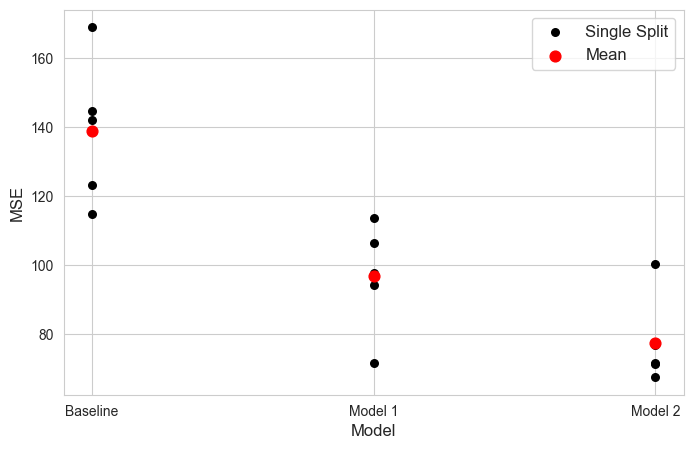

In [13]:
## This figure will compare the performance
plt.figure(figsize=(8,5))

plt.scatter(np.zeros(5), mses[0,:], s=30, c='k', label="Single Split")
plt.scatter(np.ones(5), mses[1,:], s=30, c='k')
plt.scatter(2*np.ones(5), mses[2,:], s=30, c='k')

plt.scatter([0,1,2], np.mean(mses, axis=1), s=60, c='r', label="Mean")

plt.legend(fontsize=12)

plt.xticks([0,1,2],["Baseline", "Model 1", "Model 2"], fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Model", fontsize=12)
plt.ylabel("MSE", fontsize=12)

plt.show()

#### Step 5. Additional modeling

From this it appears that Model 2 is our best choice, it has the lowest average cross-validation MSE.

For this particular problem we will end here, but in practice you will probably want to tweak and try additional models. After intial modeling you may want to reassess your comparison model. For example, in this problem additional models would be compared to Model 2, since it performed best.

#### Step 6. Test set sanity check

Once you are done tinkering and have settled on a final model (or a final set of a few models) you can perform your final check with the test set. The purposes of this check are twofold:
1. We will be able to see if we had any coding errors in our work up to this point, performance that greatly departs from what we would expect may indicate a coding error in our earlier work and
2. It allows us to assess overfitting (more on this soon). When our test performance is significantly worse than our training performance it suggests that our model has overfit on the training data and will not generalize well.

If you notice weird behavior on the test set it may be worth reviewing your previous work and checking out different models.

In [14]:
## Make a final model object
model = LinearRegression(copy_X=True)

In [15]:
## fit that on the entire training set
model.fit(bb_train.RA.values.reshape(-1,1), bb_train.W.values)

LinearRegression()

In [16]:
## print the training set performance
print("Training set MSE:", 
      np.round(mean_squared_error(bb_train.W.values, model.predict(bb_train.RA.values.reshape(-1,1))),2))


## print the test set performance
print("Test set MSE:", 
      np.round(mean_squared_error(bb_test.W.values, model.predict(bb_test.RA.values.reshape(-1,1))),2))

Training set MSE: 77.03
Test set MSE: 66.65


These are comparable performances, so I think we are in the clear for overfitting and coding errors.

Also <i>note</i> that it is not common for the test set to have better performance than the training set.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)